### Survey of the mobile operator plans

Company "Megaline" - Federal Mobile operator rolls out new mobile plans - "Smart" and "Ultra". Based on the provided data from mobile operator it's required to analyze two plans and client's behavior to understand what plan would bring higher income to the company. 

The tasks are following:
- Import the data, and conduct overview analysis;
- Prepare data fo the further analysis;
- Define the distribution type of data on both plans for internet, messages and minutes usage, find the expected mean value, dispersion and standard deviation.
- Test the hypotheses;
- Make the conclusion on the conduct data analysis.

## Data Import

In [1]:
import pandas as pd
import math
import pylab as pl
import numpy as np
from scipy import stats as st

**Data import and overview**


In [2]:
calls = pd.read_csv('calls.csv')

calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# changing of datatype of column call_date
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [5]:
internet = pd.read_csv('internet.csv',index_col=[0] )

internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
# changing of datatype of column session_date
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [8]:
tariffs = pd.read_csv('tariffs.csv')

tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users = pd.read_csv('users.csv')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
messages = pd.read_csv('messages.csv')

messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'] ,format='%Y-%m-%d')

**Data import and overview conclusion**

Five datasets were imported: calls, tariffs, internet, users and messages;

1) calls dataset has 202607 rows and 4 columns: user id, call date, call id, duration;

2) tarrifs dataset - 2 rows (two plans - ultra and smart) and 8 columns:
- messages_included	;
- mb_per_month_included	;
- minutes_included	;
- rub_monthly_fee (monthly payment);
- rub_per_gb	(in case of exceeding monthly package);
- rub_per_message	(in case of exceeding monthly package);
- rub_per_minute	(in case of exceeding monthly package);
- tariff_name;

3) internet dataset has 149396 rows and 4 columns - session id,	mb_used,session_date, user_id;

4) users dataset has 500 rows and following columns:
- client age;       
- churn_date;
- client city;      
- first_name;
- last_name;
- reg_date;
- tariff (plans);

5) messages dataset has 123036 rows and 3 columns with information on message id, user id and message date.

## Data Preparation

### Dataset merging and data preparation

**Calculation of total quantity of messages per month**

In [14]:
messages['month'] = messages['message_date'].dt.month
messages['month'] = messages['month'].astype(int)
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [15]:
messages_months = messages.groupby(['user_id','month']).count().reset_index()
messages_months = messages_months.drop(columns = 'id')
messages_months

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**Calculation of total quantity of spent minutes per month**

In [16]:
calls['month'] = calls['call_date'].dt.month
calls['month'] = calls['month'].astype(int)
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


**Data calculation on each client**

In [17]:
# function for calculation of correct calls duration
def calls_duration_func (data_calls):
    duration = data_calls['duration']
    if duration > 0:
        correct_duration = (math.ceil(data_calls['duration']))
        return(correct_duration)
    else:
        return(0)

In [18]:
# calls duration calculation
calls['correct_duration'] = calls.apply(calls_duration_func,axis=1)
calls.head()

,id,call_date,duration,user_id,month,correct_duration
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6


In [19]:
# calls calculation on user per month
calls_months = calls.groupby(['user_id','month']).sum().reset_index()
calls_months = calls_months.drop(columns = 'duration')
calls_months 

,user_id,month,correct_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [20]:
# internet calculation
internet['month'] = internet['session_date'].dt.month
internet['month'] = internet['month'].astype(int)
internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [21]:
# internet calculation on user per month
internet_months = internet.groupby(['user_id','month']).sum().reset_index()
internet_months

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [22]:
# merging datasets users and calls
users = pd.merge(users,calls_months,on='user_id',how='left')
users = users.rename(columns={'correct_duration': 'calls_duration'})
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0
...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0
3178,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0
3179,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0
3180,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0


In [23]:
# addition of internet usage info to datset
users = pd.merge(users,internet_months,on=['user_id','month'],how='left')
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,mb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2253.49
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23233.77
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14003.64
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,14055.93
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,14568.91
...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,20579.36
3178,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,1845.75
3179,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,17788.51
3180,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,17963.31


In [24]:
# addition of messages info to dataset
users = pd.merge(users,messages_months,on=['user_id','month'],how='left')
users = users.rename(columns={'message_date': 'messages_qty'})
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,mb_used,messages_qty
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2253.49,22.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23233.77,60.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14003.64,75.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,14055.93,81.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,20579.36,42.0
3178,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,1845.75,11.0
3179,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,17788.51,48.0
3180,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,17963.31,59.0


In [25]:
# display of tarriffs dataset
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
smart = tariffs.query('tariff_name == "smart"').reset_index()

In [27]:
ultra = tariffs.query('tariff_name == "ultra"').reset_index()

**Calculation of total income of company from each client***

In [28]:
def total_fee (user_name):
    tariff = user_name['tariff']
    calls = user_name['calls_duration']
    msgs = user_name['messages_qty']
    internet = user_name['mb_used']
    if tariff == 'smart':
        total_fee=smart['rub_monthly_fee'][0]
        if calls > smart['minutes_included'][0]:
            total_fee += (calls-smart['minutes_included'][0])*smart['rub_per_minute'][0]
        if msgs>smart['messages_included'][0]:
            total_fee+= (msgs-smart['rub_per_message'][0])*3
        if internet > smart['mb_per_month_included'][0]:
            total_fee+= math.ceil((internet-smart['mb_per_month_included'][0])/1000)*smart['rub_per_gb'][0]
        return(total_fee)
    else:
        total_fee=ultra['rub_monthly_fee'][0]
        if calls > ultra['minutes_included'][0]:
            total_fee += (calls-ultra['minutes_included'][0])*ultra['rub_per_minute'][0]
        if msgs>ultra['messages_included'][0]:
            total_fee+= (msgs-ultra['rub_per_message'][0])*3
        if internet > ultra['mb_per_month_included'][0]:
            total_fee+= math.ceil((internet-ultra['mb_per_month_included'][0])/1000)*ultra['rub_per_gb'][0]
        return(total_fee)

In [29]:
# creation new column - total fee using function
users['total_fee'] = users.apply(total_fee,axis=1)
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_duration,mb_used,messages_qty,total_fee
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,2253.49,22.0,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,23233.77,60.0,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,14003.64,75.0,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,14055.93,81.0,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,14568.91,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,20579.36,42.0,1750.0
3178,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,1845.75,11.0,550.0
3179,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,17788.51,48.0,1150.0
3180,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,17963.31,59.0,1654.0


## Data Analysis

***Splitting the data on two groups by plans***

In [30]:
ultra_users = users.query('tariff == "ultra"')
smart_users = users.query('tariff == "smart"')

***Display the information on the minutes usage on plan smart***

expectation: 419.0629779577148 
 variance: 35828.06530953033 
 st dev: 189.2830296395594


Text(0, 0.5, 'probability')

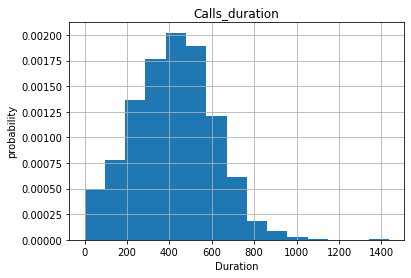

In [31]:
print('expectation:',smart_users.calls_duration.mean(),'\n',
      'variance:',np.var(smart_users.calls_duration),'\n',
      'st dev:',np.std(smart_users.calls_duration))
smart_users.calls_duration.hist(density=True,bins=15)

# Set title
pl.title("Calls_duration")
  
# adding labels
pl.xlabel('Duration')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with binominal law*

***Display the information on the internet usage on plan smart***

expectation: 16216.661273627364 
 variance: 34412098.45716458 
 st dev: 5866.182613690489


Text(0, 0.5, 'probability')

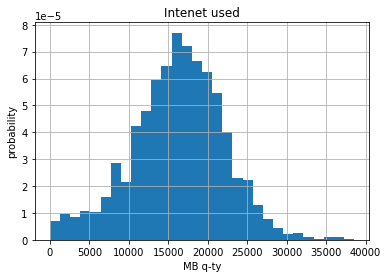

In [32]:
print('expectation:',smart_users.mb_used.mean(),'\n',
      'variance:',np.var(smart_users.mb_used),'\n',
      'st dev:',np.std(smart_users.mb_used))

smart_users.mb_used.hist(density=True,bins=30)

# Set title
pl.title("Intenet used")
  
# adding labels
pl.xlabel('MB q-ty')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with standard distribution*

***Display the information on the message usage on plan smart***

expectation: 38.74739039665971 
 variance: 718.7973574905967 
 st dev: 26.810396444114673


Text(0, 0.5, 'probability')

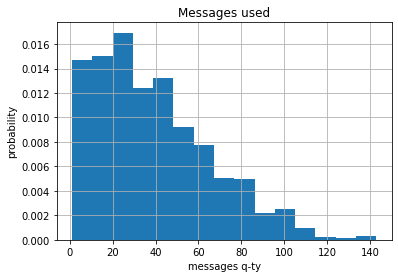

In [33]:
print('expectation:',smart_users.messages_qty.mean(),'\n',
      'variance:',np.var(smart_users.messages_qty),'\n',
      'st dev:',np.std(smart_users.messages_qty))

smart_users.messages_qty.hist(density=True,bins=15)

# Set title
pl.title("Messages used")
  
# adding labels
pl.xlabel('messages q-ty')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with geometric distribution*

***Display the information on the minutes usage on plan ultra***

expectation: 545.4511041009464 
 variance: 94104.36117385983 
 st dev: 306.76434143143143


Text(0, 0.5, 'probability')

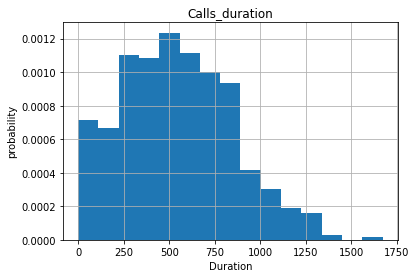

In [34]:
print('expectation:',ultra_users.calls_duration.mean(),'\n',
      'variance:',np.var(ultra_users.calls_duration),'\n',
      'st dev:',np.std(ultra_users.calls_duration))

ultra_users.calls_duration.hist(density=True,bins=15)

# Set title
pl.title("Calls_duration")
  
# adding labels
pl.xlabel('Duration')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with binominal law*

***Display the information on the traffic use on plan smart***

expectation: 19669.283602550477 
 variance: 99465187.55618352 
 st dev: 9973.223528838784


Text(0, 0.5, 'probability')

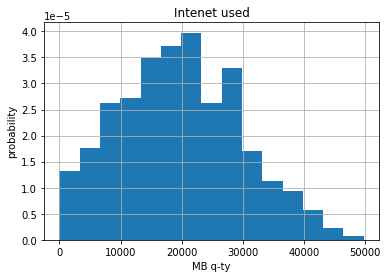

In [35]:
print('expectation:',ultra_users.mb_used.mean(),'\n',
      'variance:',np.var(ultra_users.mb_used),'\n',
      'st dev:',np.std(ultra_users.mb_used))

ultra_users.mb_used.hist(density=True,bins=15)

# Set title
pl.title("Intenet used")
  
# adding labels
pl.xlabel('MB q-ty')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with binominal law*

***Display the information on the message usage on plan ultra***

expectation: 61.19553805774278 
 variance: 1996.9499538443522 
 st dev: 44.68724598634774


Text(0, 0.5, 'probability')

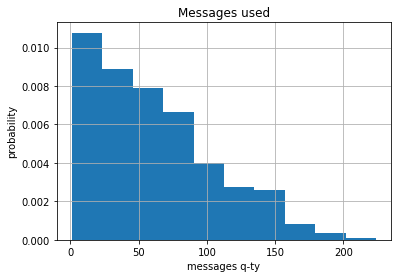

In [36]:
print('expectation:',ultra_users.messages_qty.mean(),'\n',
      'variance:',np.var(ultra_users.messages_qty),'\n',
      'st dev:',np.std(ultra_users.messages_qty))

ultra_users.messages_qty.hist(density=True,bins =10)

# Set title
pl.title("Messages used")
  
# adding labels
pl.xlabel('messages q-ty')
pl.ylabel('probability')

*Based on histogram we can say that data is distributed in accordance with geometric distribution*
___

## Hypotheses testing

### Hypothesis 1

**Average income per user on plans ultra and smart are different.**

In [37]:
print('Average income per client on ultra plan:',round(np.var(ultra_users.total_fee),2),'\t',
      'Average income per client on smart plan:', round(np.var(smart_users.total_fee),2))

Average income per client on ultra plan: 149647.31 	 Average income per client on smart plan: 710110.72


Text(0, 0.5, 'probability')

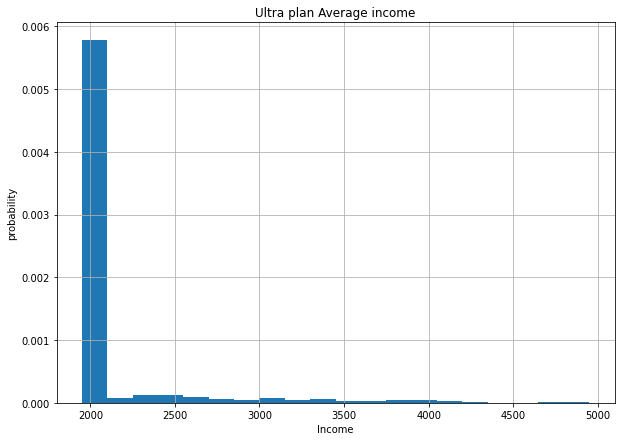

In [38]:
ultra_users.total_fee.hist(density=True,bins =20, figsize = (10,7))

# Set title
pl.title("Ultra plan Average income")
  
# adding labels
pl.xlabel('Income')
pl.ylabel('probability')

Text(0, 0.5, 'probability')

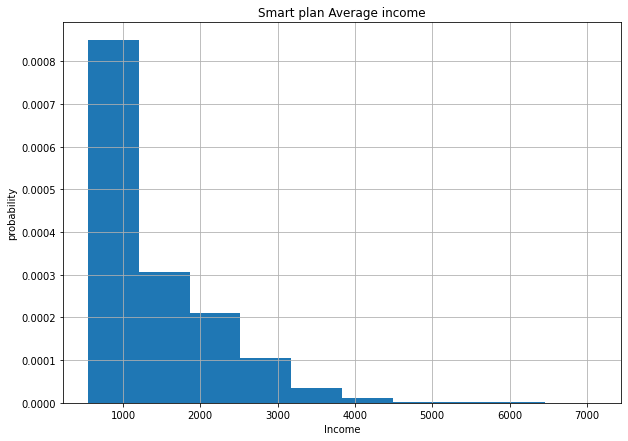

In [39]:
smart_users.total_fee.hist(density=True,bins =10,figsize = (10,7))

# Set title
pl.title("Smart plan Average income")
  
# adding labels
pl.xlabel('Income')
pl.ylabel('probability')

In [40]:
alpha = 0.05

results = st.ttest_ind(ultra_users.total_fee,smart_users.total_fee,equal_var=False)
print('p.value:',results.pvalue,'\n')

if results.pvalue > alpha:
    print('Result:','Reject the hypothesis')
else:
    print('Result:',"Can not reject the hypothesis")
    

p.value: 3.7790205288399806e-212 

Result: Can not reject the hypothesis


***H0 - Average income from clients on plans "smart" and "ultra" is similar.\
H1 - Average income from clients on plans "smart" and "ultra" is different.***

**Hypothesis is confirmed - p-value < alpha**

***For hypothesis testing was used ttest_ind for the correct comparison of arrays.***
___

### Hypothesis 2

**The average income from clients in Moscow and other regions is different.**

In [41]:
moscow_users = users.query('city == "Москва"')
other_users = users.query('city != "Москва"')

print('Average income per client in Moscow:', round(np.var(moscow_users.total_fee),2),'\t',
      'Average income per client outside Moscow:',round(np.var(other_users.total_fee),2))

Average income per client in Moscow: 573827.65 	 Average income per client outside Moscow: 673772.45


Text(0, 0.5, 'probability')

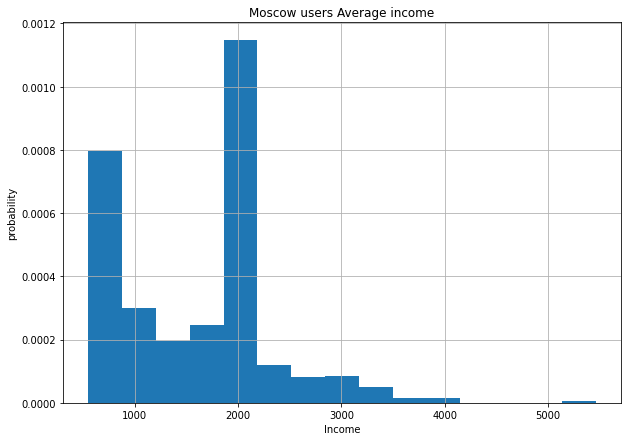

In [42]:
moscow_users.total_fee.hist(density=True,bins =15,figsize = (10,7))

# Set title
pl.title("Moscow users Average income")
  
# adding labels
pl.xlabel('Income')
pl.ylabel('probability')

Text(0, 0.5, 'probability')

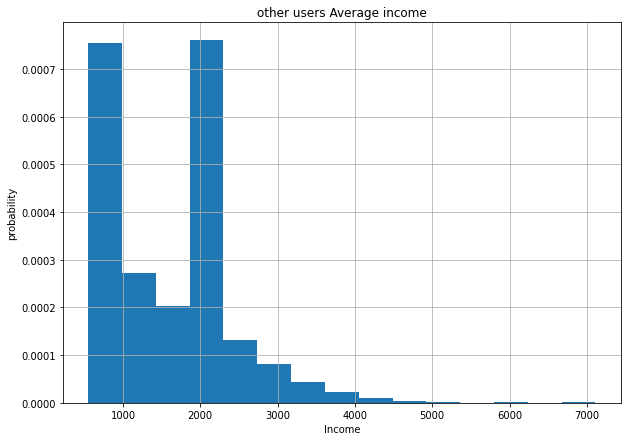

In [43]:
other_users.total_fee.hist(density=True,bins =15,figsize = (10,7))

# Set title
pl.title("other users Average income")
  
# adding labels
pl.xlabel('Income')
pl.ylabel('probability')

In [44]:
alpha = 0.05

results = st.ttest_ind(moscow_users.total_fee,other_users.total_fee,equal_var=False)
print('p.value:',round(results.pvalue,2))

if results.pvalue > alpha:
    print('Result:','Reject the hypothessis')
else:
    print('Result:',"Can not reject the hypothesis")

p.value: 0.73
Result: Reject the hypothessis


***H0 - Average income from clients in Moscow and outside Moscow is similar.\
H1 - Average income from clients in Moscow and outside Moscow  is different.***

**Hypothesis is rejected - p-value > alpha**

***For hypothesis testing was used ttest_ind for the correct comparison of arrays***
___

## Conclusion

***Based on the provided data and merged table, which has all the information on users it's possible to conclude the following:***

1)  Minutes usage for calls by users are distributed in accordance with binominal law, and has the following statistic indices:
- mobile plan smart:
        Expected mean value  - ~419
        Dispersion - ~35828
        Standard deviation - ~189
- mobile plan ultra:
        Expected mean value - ~545
        Dispersion - ~94104
        Standard deviation - ~306
        
2)  Internet traffic usage on plans smart is distributed in accordance with geometric distribution, on the ultra plan traffic usage is distributed in accordance with binominal law. The indices for both plans are following:
- mobile plan smart:
        Expected mean value - ~16216
        Dispersion - ~34412098
        Standard deviation - ~5866
- mobile plan ultra:
        Expected mean value  - ~ 19669
        Dispersion - ~99465187
        Standard deviation - ~9973
3) Message usage is distributed in accordance with geometric distribution and has the following indices:
- mobile plan smart:
        Expected mean value - ~38
        Dispersion - ~718
        Standard deviation - ~26
- mobile plan ultra:
        Expected mean value - ~61
        Dispersion - ~1996
        Standard deviation - ~44

4) The Hypothesis 1 - Average income from clients on plans "Ultra" and "Smart" is different is confirmed.

5) The Hypothesis 2 - Average income from clients in and outside Moscow is different is not confirmed.